Я работаю аналитиком в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Приоритизация гипотез

### Изучение данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from pandas import option_context
import scipy.stats as stats

In [2]:
# Загрузим данные о гипотезах по увеличению выручки
df = pd.read_csv('/datasets/hypothesis.csv')
with option_context('display.max_colwidth', 400):
    display(df)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Видим, что все данные имеют верный тип, поэтому перейдем непосредственно к анализу.

### Применение ICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета

Сначала посчитаем ICE для приоритизации гипотез. Добавим полученные значения ICE к существующей таблице. Новый столбец назовите ICE. 
Выведем столбцы 'hypothesis' и 'ICE', отсортированные по столбцу 'ICE'

In [4]:
df['ICE'] = df['Impact'] * df['Confidence']/df['Efforts']
display(df[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Таким образом, наиболее перспективные гипотезы по ICE: 8 (Запустить акцию, дающую скидку на товар в день рождения), 0 (Добавить два новых канала привлечения трафика) и 7 (Добавить форму подписки на все основные страницы).

### Применение RICE для приоритизации гипотез. Сортировка гипотез по убыванию приоритета

Теперь применим RICE для приоритизации гипотез. По аналогии с ICE добавим столбец RICE к существующей таблице. Выведем столбцы 'hypothesis' и 'RICE', отсортированные по столбцу 'RICE'

In [5]:
df['RICE'] = df['Reach']*df['Impact']*df['Confidence']/df['Efforts']
display(df[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Здесь получили несколько иной результат. Гипотеза 8, которая была на 1 месте при ICE, оказалась лишь на 5 месте. На 1 место вышла гипотеза 7, которая при ICE была лишь на 3 месте. Зато в лидеры вошли гипотезы 2 (Добавить блоки рекомендаций товаров на сайт) и 6 (Показать на главной странице баннеры). Это произошло потому что охват пользователей у данных гипотез выше, чем у гипотезы 8. Например, у гипотезы 7 самый большой охват аудитории (10 баллов из 10), в то время как у гипотезы 8 самый низкий охват аудитории (1 балл из 10). Гипотезы 2, которые не входили в лидеры при применении ICE, но на 2 месте при подсчете RICE, также имеет достаточно высокий охват (8 баллов из 10). Гипотеза 6 оказалась на 6 месте и при ICE и при RICE. 

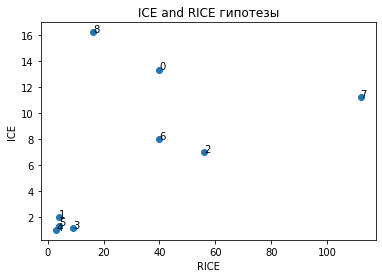

In [6]:
y = df['ICE'] 
z = df['RICE'] 
n = df.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE");

## Анализ А/В теста

### Подготовка данных

Посмотрим на результат проведенного А/В теста, изучив данные в файлах.

In [7]:
# откроем файл с заказами
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
# откроем файл с посетителями
visitors = pd.read_csv('/datasets/visitors.csv')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
print ('Дубликатов в таблице:', orders.duplicated().sum() )

Дубликатов в таблице: 0


In [10]:
print ('Дубликатов в таблице:', visitors.duplicated().sum() )

Дубликатов в таблице: 0


Видим, что дубликаты в датафреймах отсутствуют. Теперь найдем количество групп, участвующих в тесте, а также даты начала и окончания тестирования

In [11]:
print(orders['group'].value_counts())

B    640
A    557
Name: group, dtype: int64


In [12]:
print(visitors['group'].value_counts())

B    31
A    31
Name: group, dtype: int64


In [13]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [14]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [15]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [16]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Таким образом, в тестировании участвуют две группы. Тестирование проводится с 1 по 31 августа 2019г.

### График кумулятивной выручки по группам

Чтобы построить графики, соберем кумулятивные данные. Для этого объявим датафрейм cumulativeData со столбцами:
-	date — дата;
-	group — группа A/B-теста (A или B);
-	orders — кумулятивное количество заказов на указанную дату в указанной группе;
-	buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
-	revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
-	visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates()

In [17]:
datesGroups = orders[['date', 'group']].drop_duplicates()
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

#Проверим, корректно ли был содан датафрейм cummulativeData. Для этого 
#найдем минимальная и максимальная даты в этом датафрейме и сравним их с минимальной и максимальной датой в исходных данных.
cumulativeData['date'].max()



Timestamp('2019-08-31 00:00:00')

In [18]:
cumulativeData['date'].min()

Timestamp('2019-08-01 00:00:00')

Даты совпадают, значит cumulativeData корректен

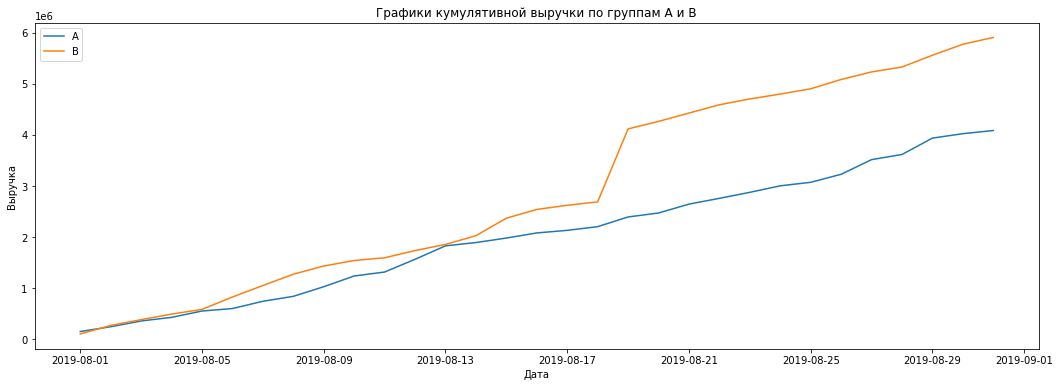

In [19]:
plt.figure(figsize=(18,6))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Графики кумулятивной выручки по группам А и В')

plt.legend()
plt.show()

Видим, что 13.08.2019г, т.е. в первой половине теста, сегмент В вырвался вперед и продолжал лидировать до самого конца теста. 18.08.17 мы наблюдаем резкий рост выручки по группе В, что может быть связано либо с ростом числа заказов, либо о появлении очень дорогих заказов в выборке. В дальнейшем необходимо будет проверить, не влияют ли на выручку сегмента В аномально большие заказы.

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

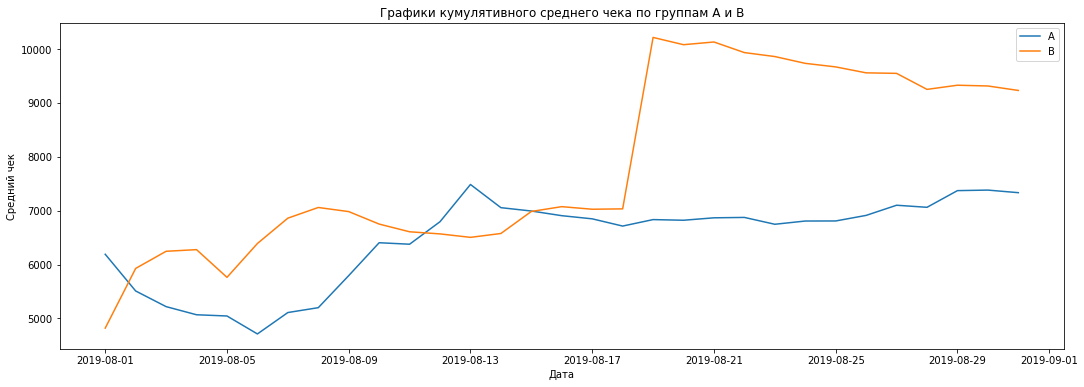

In [20]:
plt.figure(figsize=(18,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Графики кумулятивного среднего чека по группам А и В')

plt.legend()
plt.show()

Видим, что до середины периода кумулятивное значение среднего чека колевлется. А вот после 20 августа средний чек в группе В резко возрастает, далее - небольшое незначительное плавное падение и остается до конца эксперимента намного выше среднего чека в группе А. Требуется дополнительный анализ выбросов, которые могли сильно исказить результат

### График относительного изменения кумулятивного среднего чека группы B к группе A

Объединим таблицы cumulativeRevenueA и cumulativeRevenueB методом merge() так, чтобы она содержала столбцы: 'date', 'revenueA', 'revenueB', 'ordersA', 'ordersB'. Сохраним результат в переменной mergedCumulativeRevenue.
Построим график относительно различия кумулятивного среднего чека группы B к группе A.
Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().


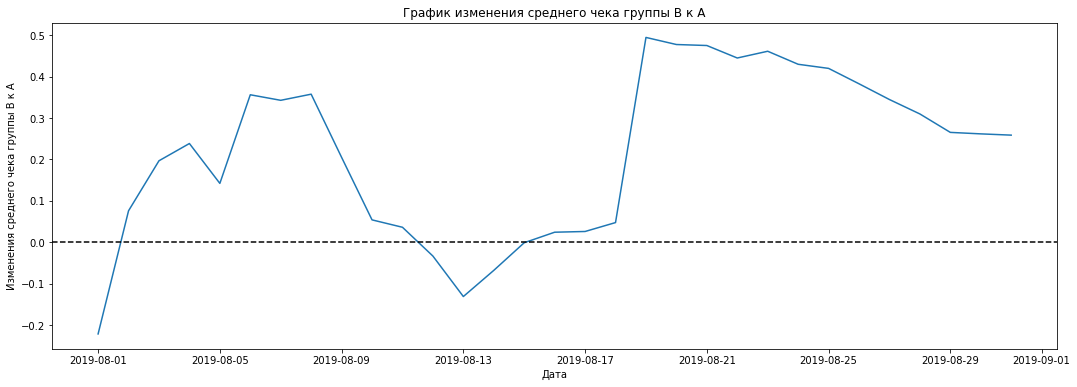

In [21]:
plt.figure(figsize=(18,6))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График изменения среднего чека группы В к А')

plt.xlabel('Дата')
plt.ylabel('Изменения среднего чека группы В к А')
plt.show()

Из графика видим, что результаты теста резко менялись несколько дат. Так, сначала средний чек группы В был несколько ниже, чем в А. Резкий скачок произошел 4.08.19г.и средний чек рос еще примерно два дня, затем опять резкое падение ниже уровня среднего чека группы А, далее опять резкий скачок ориентировочно 20.08.19. Скорее всего, 4.08 и 20.08 были совершены аномальные заказы, но это необходимо будет проверить.

### Кумулятивная конверсия по группам

Для расчета кумулятивной конверсии добавим в файл cumulativeData столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
В переменных cumulativeDataA и cumulativeDataB сохраним данные о заказах в сегментах A и B соответственно.
Построим графики кумулятивной конверсии по дням по группам

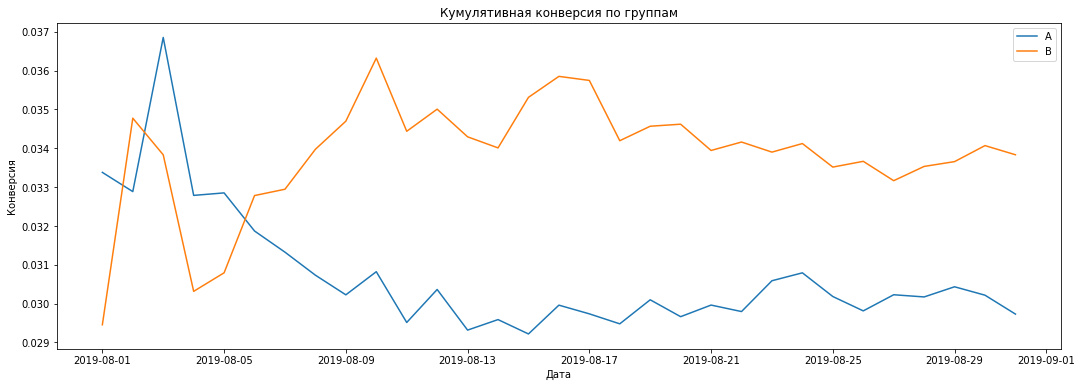

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(18,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend()
plt.show()


Из графика видно, что в начале эксперимента конверсия гуппы В значительно ниже конверсии группы А (2,9% против 3,7), но примерно через 5 дней конверсии сравнялись на уровне 3,2%, затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.
Построим график относительного различия кумулятивных конверсий


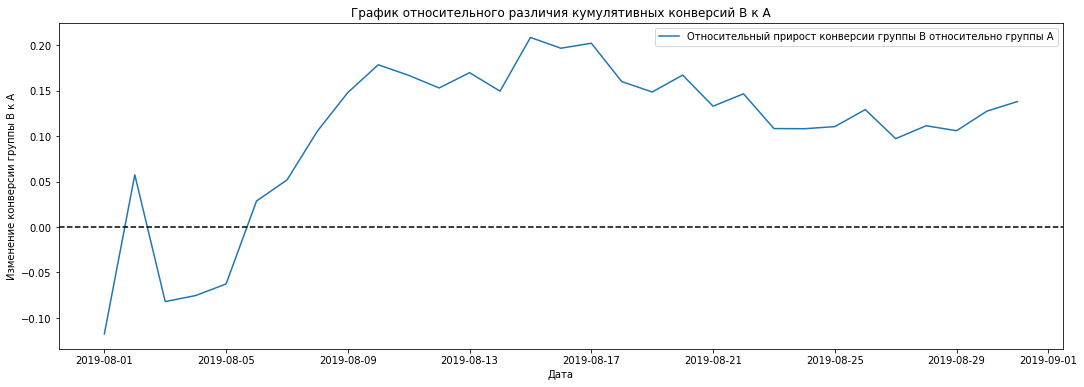

In [23]:
plt.figure(figsize=(18,6))

# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение конверсий
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного различия кумулятивных конверсий В к А')
plt.xlabel('Дата')
plt.ylabel('Изменение конверсии группы В к А')

plt.show()


Этот график подтверждает выводы предыдущего: конверсия группы В, несмотря на некоторые колебания в начале эксперимента, значительно выше конверсии группы А

### Точечный график количества заказов по пользователям

Сначала найдем число заказов по пользователям — создадим датафрейм c двумя столбцами: 'visitor' и 'transaction'. Назовем его ordersByUsers, отсортируем по убыванию количества заказов пользователей и посмотрим первые 10 строк.


In [24]:
# Cгруппируем заказы по пользователям и подсчитаем число уникальных заказов по сгруппированным данным

ordersByUsers = orders.drop(['revenue', 'group', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})

ordersByUsers.columns = ['visitor', 'transaction']

ordersByUsers = ordersByUsers.sort_values(by='transaction',ascending=False)
ordersByUsers


,visitor,transaction
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


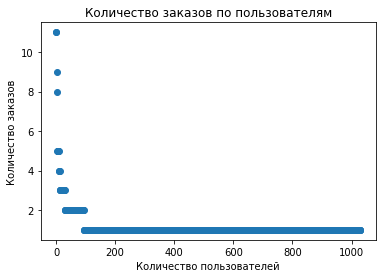

In [25]:
# Построим точечный график методом scatter(). 
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['transaction'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show()

Видим, что большинство пользователей сделали по одному заказу. Около 100 пользователей сделали по 2 заказа. Пользователей, сдлелавших 3 и более заказа, очень мало. Чтобы понять, 2-3 заказа - это аномалия или нет, посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя.

In [26]:
print(np.percentile(ordersByUsers['transaction'], [95, 99])) 

[2. 4.]


Таким образом, не более 5% пользователей оформляли 2 заказа и больше. И не более 1% пользователей заказывали более четырех раз.
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеим аномальных пользователей по ней.

### Точечный график стоимости заказов

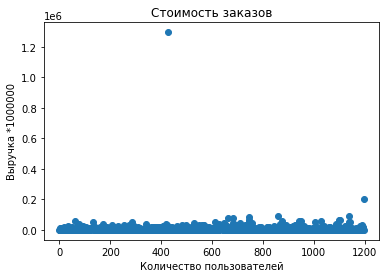

In [27]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Выручка *1000000')
plt.show()


Построим еще гистограмму распределения стоимостей заказов

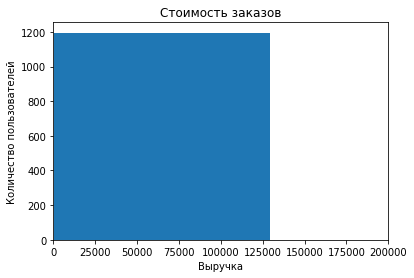

In [28]:
plt.hist(orders['revenue']) 
plt.xlim(xmin=0)
plt.xlim(xmax=200000)
plt.title('Стоимость заказов')
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.show()

Видим, что дорогих заказов очень мало. Один заказ стоимостью 1 200 000 у.е и один заказ 200 000. Остальные менее 125 000. Для того, чтобы установить границы аномалии, посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [29]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Видим, не более 5% заказов имеют стоимость более 28000 у.е. И не более 1% заказов имеют чек более 58233 у.е. Выберем 28000 за нижнюю границу стоимости заказов, и отсеим аномальную выручку по ней.

### Статистическая значимость различий в конверсии по "сырым" данным

Сначала рассчитаем статистическую значимость различий в конверсии по "сырым" данным, т.е. без удаления аномальных значений. 
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть. Для расчета статистической значимости создадим переменные ordersByUsersA и ordersByUsersB со столбцами visitor и transaction, где для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов. Объявим переменные sampleA и sampleB, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 
Применим тест Манна-Уитни.

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorA', 'transactionA']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorB', 'transactionB'] 


# Количество пользователей, которые ничего не заказывали, равно разнице между суммой посетителей и количеством записей о заказах
sampleA = pd.concat([ordersByUsersA['transactionA'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['transactionA'])), name='transactionA')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionB'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['transactionB'])), name='transactionB')],axis=0) 

print('p-value', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Прирост конверсии группы В к А', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



p-value 0.017
Прирост конверсии группы В к А 0.138


p-value меньше уровня значимости 0,05, поэтому отвергаем нулевую гипотезу. Т.е. в конверсии между группами есть значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет 13,8%

### Статистическая значимость различий в среднем чеке по "сырым" данным

Сформулируем гипотезы. Нулевая: различий в среднем чеке (по "сырым" данным) между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [31]:
print('p-value', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Прирост среднего чека группы В к А', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value 0.729
Прирост среднего чека группы В к А 0.259


p-value больше уровня значимости 0,05, поэтому принимаем нулевую гипотезу о равенстве средних чеков между группами. Относительное различие среднего чека между группами 26%.
Далее рассчитаем статистическую значимость в конверсии и среднем чеке по очищенным от аномалий данным. 

### Статистическая значимость различий в конверсии по "очищенным" данным

В п.2.6.  п.2.7. мы приняли за аномальных пользователей тех, кто совершил более 2 заказов, или совершил заказ на сумму свыше 28 000 рублей. Уберем 5% пользователей с наибольшим числом заказов и от 5% заказов с наибольшей стоимостью.
Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers, удалим дубликаты, отсортируем по возрастанию.


In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionA'] > 2]['visitorA'],
        ordersByUsersB[ordersByUsersB['transactionB'] > 2]['visitorB'],
    ],
    axis=0,
)
revenu_max=np.percentile(orders['revenue'], [95, 99])[0]
usersWithExpensiveOrders = orders[orders['revenue'] >  revenu_max]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head(5)
abnormalUsers.shape[0] 


74

Всего 74 аномалии. После удаления всех найденных аномальных пользователей можно будет считать статистическую значимость по очищенным данным. Создадим переменные sampleAFiltered и sampleBFiltered, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей.
Посчитаем p-value для сравнения конверсии между очищенными группами и относительный прирост конверсии очищенной группы B.

In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorA'].isin(abnormalUsers))
        ]['transactionA'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['transactionA'])), name='transactionA')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorB'].isin(abnormalUsers))
        ]['transactionB'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['transactionB'])), name='transactionB')],axis=0)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.01304
0.173


Таким образом, видим, что удаление аномальных значений практически не повлияло на конверсию: p-value меньше уровня значимости 0,05, поэтому отвергаем нулевую гипотезу. Т.е. в конверсии между группами по-прежнему есть значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет 17,3%

### Статистическая значимость различий в среднем чеке по "очищенным" данным

Теперь посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [34]:
print('p-value',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Прирост среднего чека В к А',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value 0.738
Прирост среднего чека В к А -0.020


Получился следующий интересный результат: без аномальных покупателей p-value практически не изменился и остался больше уровня значимости 0,05, поэтому принимаем нулевую гипотезу о равенстве средних чеков между группами. А вот относительный прирост среднего чека группы В с 26% снизился до падения в незначительные 2%. Получается, что несколько покупателей в группе В с аномально высокими чеками искажали всю картину.

### Вывод по результатам А/В теста

1.	Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2.	Нет статистически значимого различия по среднему чеку между группами. 
3.	График различия конверсии между группами, построенный в п.2.5, сообщает, что результаты группы B значительно лучше группы A
4.	Принимаем решение остановить тест, признать его успешным и перейти к проверке следующей гипотезы.